<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C3W3_IMDB_Subwords_8K_with_Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWRZJ8X/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWRZJ8X/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWRZJ8X/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
# Access the prelearned tokenizer which is trained on subwords
# tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Rondomly shuffles the elements of this dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)

# Padding batches
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
 for sample_text, sample_label in train_dataset.take(1):
   print(sample_text)
   print('-' * 40)
   print(sample_label)

tf.Tensor(
[[3187   89   63 ...    0    0    0]
 [7410 2977  291 ...    0    0    0]
 [  12  284   14 ...    0    0    0]
 ...
 [ 156   12 4597 ...    0    0    0]
 [ 135 7968    8 ...    0    0    0]
 [  12  109 7968 ...    0    0    0]], shape=(64, 1063), dtype=int64)
----------------------------------------
tf.Tensor(
[0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0], shape=(64,), dtype=int64)


In [6]:
# Build the single layer LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Training the model
NUM_EPOCHS = 10

history = model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 60s 153ms/step - loss: 0.5091 - accuracy: 0.7414 - val_loss: 0.3963 - val_accuracy: 0.8362
Epoch 2/10
391/391 [==============================] - 60s 154ms/step - loss: 0.3713 - accuracy: 0.8457 - val_loss: 0.3940 - val_accuracy: 0.8415
Epoch 3/10
391/391 [==============================] - 61s 155ms/step - loss: 0.4114 - accuracy: 0.8149 - val_loss: 0.4780 - val_accuracy: 0.8086
Epoch 4/10
391/391 [==============================] - 61s 156ms/step - loss: 0.2934 - accuracy: 0.8856 - val_loss: 0.4369 - val_accuracy: 0.8305
Epoch 5/10
391/391 [==============================] - 61s 155ms/step - loss: 0.2444 - accuracy: 0.9070 - val_loss: 0.4203 - val_accuracy: 0.8414
Epoch 6/10
391/391 [==============================] - 61s 157ms/step - loss: 0.1894 - accuracy: 0.9331 - val_loss: 0.4425 - val_accuracy: 0.8368
Epoch 7/10
391/391 [==============================] - 61s 155ms/step - loss: 0.1467 - accuracy: 0.9492 - val_loss: 0.4648 - val_ac

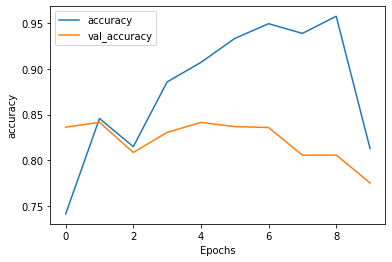

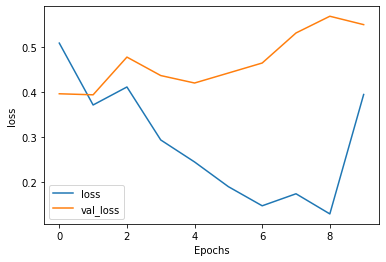

In [8]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')